In [77]:
import pickle
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from numpy.random import seed

from keras.utils import plot_model

from keras import regularizers

from keras.models import model_from_json
import csv
import json



X Training set (images) shape: (11829, 28, 28, 1)
X Testset set (images) shape: (5070, 28, 28, 1)
Y Training set (images) shape: (11829, 10)


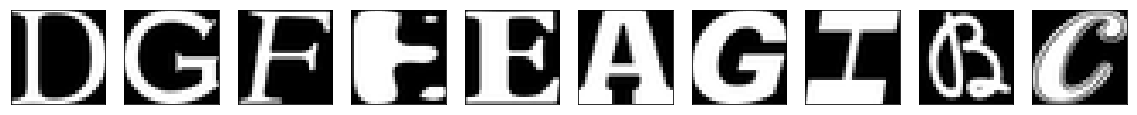

X Training set normalized (images) shape: (11829, 784)
X Testset set normalized (images) shape: (5070, 784)
Y Training set normalized (images) shape: (11829, 20)

Noisy Images


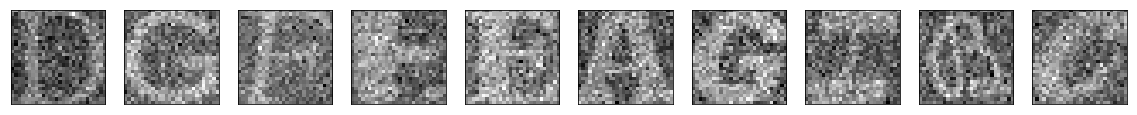

In [86]:
# Load x_test features from file
filename = "./x_test.obj"
with open(filename, 'rb') as file:  
    x_test = pickle.load(file)
    file.close()
    
# Load x_train features from file
filename = "./x_train.obj"
with open(filename, 'rb') as file:  
    x_train = pickle.load(file)
    file.close()
    
# Load y_train label from file
filename = "./y_train.obj"
with open(filename, 'rb') as file:  
    y_train = pickle.load(file)
    file.close()

#See wich data you have
print("X Training set (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set (images) shape: {shape}".format(shape=y_train.shape))

#Trasform the y_train to categorical
y_train = to_categorical(y_train)

#Plot the letters
n = 10  # how many letters we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


y_train = y_train.astype('float32') / 255.
y_train = y_train.reshape((len(y_train), np.prod(y_train.shape[1:])))

#Create a training and test set with some noise to have a much more robust model
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

y_train_noisy = y_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_train.shape)

print("X Training set normalized (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set normalized (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set normalized (images) shape: {shape}".format(shape=y_train.shape))

print("\nNoisy Images")

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Build a simple autoencoder
  
Single fully-connected neeural layer as encoder and as decoder

In [98]:
# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# encoded = Dense(encoding_dim, activation='relu')(encoded)

# encoded = Dense(128, activation='relu')(input_img)
# encoded = Dense(64, activation='relu')(encoded)
# encoded = Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# decoded = Dense(64, activation='relu')(encoded)
# decoded = Dense(128, activation='relu')(decoded)
# decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

###Create a separate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

###Create a Decoder Model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))



In [99]:

#Now train autoencoder to reconstruct the input images
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

seed(42)

#Launch the autoencoder
history = autoencoder.fit(x_train, x_train,
                    epochs=126,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test))



Train on 11829 samples, validate on 5070 samples
Epoch 1/126
11829/11829 [==============================] - 1s 124us/step - loss: 0.6894 - acc: 0.3227 - val_loss: 0.6795 - val_acc: 0.3493
Epoch 2/126
11829/11829 [==============================] - 1s 59us/step - loss: 0.6602 - acc: 0.3743 - val_loss: 0.6399 - val_acc: 0.3932
Epoch 3/126
11829/11829 [==============================] - 1s 60us/step - loss: 0.6264 - acc: 0.4051 - val_loss: 0.6130 - val_acc: 0.4175
Epoch 4/126
11829/11829 [==============================] - 1s 59us/step - loss: 0.5984 - acc: 0.4307 - val_loss: 0.5828 - val_acc: 0.4427
Epoch 5/126
11829/11829 [==============================] - 1s 50us/step - loss: 0.5676 - acc: 0.4531 - val_loss: 0.5529 - val_acc: 0.4612
Epoch 6/126
11829/11829 [==============================] - 1s 49us/step - loss: 0.5382 - acc: 0.4708 - val_loss: 0.5249 - val_acc: 0.4774
Epoch 7/126
11829/11829 [==============================] - 1s 53us/step - loss: 0.5104 - acc: 0.4859 - val_loss: 0.4987 - 

11829/11829 [==============================] - 1s 51us/step - loss: 0.2433 - acc: 0.5826 - val_loss: 0.2449 - val_acc: 0.5810
Epoch 60/126
11829/11829 [==============================] - 1s 47us/step - loss: 0.2421 - acc: 0.5829 - val_loss: 0.2437 - val_acc: 0.5812
Epoch 61/126
11829/11829 [==============================] - 1s 44us/step - loss: 0.2410 - acc: 0.5831 - val_loss: 0.2425 - val_acc: 0.5814
Epoch 62/126
11829/11829 [==============================] - 1s 44us/step - loss: 0.2399 - acc: 0.5834 - val_loss: 0.2421 - val_acc: 0.5817
Epoch 63/126
11829/11829 [==============================] - 1s 45us/step - loss: 0.2389 - acc: 0.5836 - val_loss: 0.2428 - val_acc: 0.5813
Epoch 64/126
11829/11829 [==============================] - 1s 48us/step - loss: 0.2379 - acc: 0.5838 - val_loss: 0.2395 - val_acc: 0.5822
Epoch 65/126
11829/11829 [==============================] - 1s 46us/step - loss: 0.2369 - acc: 0.5840 - val_loss: 0.2384 - val_acc: 0.5824
Epoch 66/126
11829/11829 [==============

Epoch 118/126
11829/11829 [==============================] - 1s 46us/step - loss: 0.2083 - acc: 0.5901 - val_loss: 0.2109 - val_acc: 0.5883
Epoch 119/126
11829/11829 [==============================] - 1s 48us/step - loss: 0.2084 - acc: 0.5901 - val_loss: 0.2102 - val_acc: 0.5884
Epoch 120/126
11829/11829 [==============================] - 1s 48us/step - loss: 0.2075 - acc: 0.5903 - val_loss: 0.2094 - val_acc: 0.5886
Epoch 121/126
11829/11829 [==============================] - 1s 47us/step - loss: 0.2077 - acc: 0.5903 - val_loss: 0.2093 - val_acc: 0.5886
Epoch 122/126
11829/11829 [==============================] - 1s 48us/step - loss: 0.2087 - acc: 0.5901 - val_loss: 0.2114 - val_acc: 0.5882
Epoch 123/126
11829/11829 [==============================] - 1s 47us/step - loss: 0.2073 - acc: 0.5903 - val_loss: 0.2085 - val_acc: 0.5888
Epoch 124/126
11829/11829 [==============================] - 1s 48us/step - loss: 0.2065 - acc: 0.5905 - val_loss: 0.2083 - val_acc: 0.5888
Epoch 125/126
11829/

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_78 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
Keras Autoencoder Keys: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


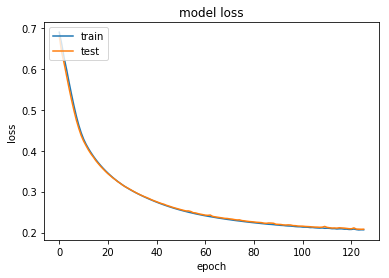

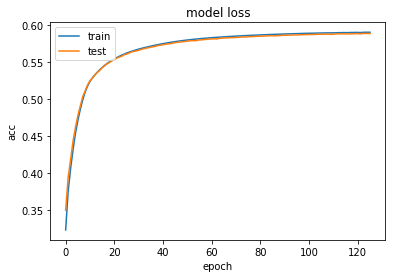

In [100]:
#Visualise the summary of the autoencoder
autoencoder.summary()

# list all data in history
print("Keras Autoencoder Keys: " + str(history.history.keys()))

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test loss histories
training_acc = history.history['acc']
test_acc = history.history['val_acc']

# summarize history for loss
plt.plot(training_loss)
plt.plot(test_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for acc
plt.plot(training_acc)
plt.plot(test_acc)
plt.title('model loss')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


[[7.61747826e-03 3.91756482e-02 5.20048924e-02 ... 7.89887563e-05
  6.73746035e-05 1.43118144e-04]
 [4.15419912e-08 3.13978177e-08 4.37021903e-08 ... 3.31562410e-06
  3.74151728e-06 7.62317222e-06]
 [5.86751885e-05 1.60497293e-04 3.70641093e-04 ... 6.39861901e-05
  7.89404949e-05 7.65346340e-05]
 ...
 [8.80921291e-08 5.63065363e-08 1.03298206e-07 ... 4.86616045e-05
  5.23092058e-05 4.45025980e-05]
 [3.17800121e-04 7.52637745e-04 7.85279030e-04 ... 6.94655240e-01
  6.27922177e-01 1.82924747e-01]
 [1.03824426e-07 1.19067082e-07 1.75527234e-07 ... 1.78779521e-06
  2.84906037e-06 5.34729634e-06]]


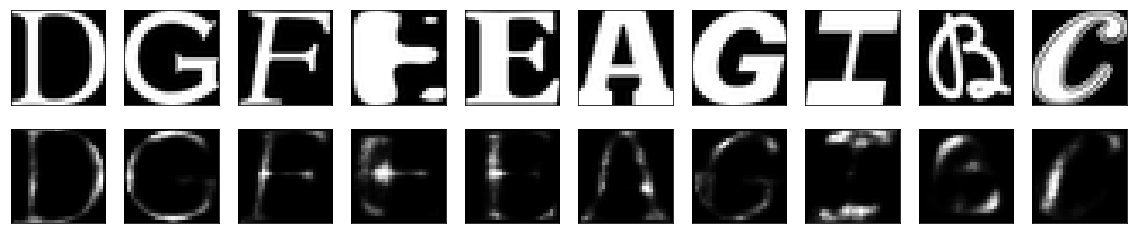

In [93]:
#Try to reconstruct and visualize inputs and the encoded representations
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [76]:
#Save the model

# serialize model to JSON
model_json = autoencoder.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
autoencoder.save_weights("model.h5")

print("Saved model to disk")


Saved model to disk


## Tests and evaluation

In [97]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")

print("Loaded model from disk")

seed(42)

# num_classes = 20

# #encoded = Flatten()(encoded)
# den = Dense(784, activation='relu')(encoded)
# out = Dense(num_classes, activation='softmax')(den)

# loaded_model = Model(input_img,out)

# for l1,l2 in zip(loaded_model.layers[:3],autoencoder.layers[0:3]):
#     l1.set_weights(l2.get_weights())
# for layer in loaded_model.layers[0:3]:
#     layer.trainable = True

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', # Categorical Cross-entropy
                optimizer='adadelta', 
                metrics=['accuracy'])

classify_train = loaded_model.fit(x_test, x_test, batch_size=64,epochs=5,verbose=1)

predicted_classes = loaded_model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

print(predicted_classes)

Loaded model from disk
Epoch 1/5
5070/5070 [==============================] - 1s 195us/step - loss: 0.1982 - acc: 0.5908
Epoch 2/5
5070/5070 [==============================] - 0s 70us/step - loss: 0.1980 - acc: 0.5909
Epoch 3/5
5070/5070 [==============================] - ETA: 0s - loss: 0.1976 - acc: 0.590 - 0s 70us/step - loss: 0.1976 - acc: 0.5910
Epoch 4/5
5070/5070 [==============================] - 0s 70us/step - loss: 0.1976 - acc: 0.5909
Epoch 5/5
5070/5070 [==============================] - 0s 68us/step - loss: 0.1969 - acc: 0.5911
[ 0 11 10 ... 11 21 10]
